___
<font color='red'> <p style="font-weight: bold;">Master's Degree in Banking and Financial Regulation</p></font>

<font color='red'> University of Navarra</font>
___

<h2>GOAL</h2>
Develop a model to predict the Probability of Default (PD) of start-up companies with a supervised non-linear model. This kind of models allow risk managers and investors to make a statistically rational investment by only lending money to the start-ups most likely to succeed in the market by fulfilling all their debt obligations.

<h2>The exercise</h2>

- You are provided with historical dataset (historical_data.csv) containing start-up companies and their descriptive features. The database contains a column TARGET wich has the value 1 if the company has defaulted and 0 otherwise. The description of the columns is provided in the file 'Dataset Description.txt'

- This notebook contains a simplistic code to create a PD non-linear model, namely it builds a toy 'model' which is non-optimized. You must improve the current code.

<h2>Minimum standards required to pass the exercise</h2>

- Provide a detailed description of the 10 most relevant variables at business level. Please, provide as well a proper substantiation (either from business intuition or using statistical tools) about the motivation of choosing those 10 variables. Discuss their business meaning.


- Improve the current non-linear dummy model performance metric (AUC) on the Test dataset without introducing additional biases. You can do so by (the following options are not mandatory, they are just provided as a guideline) adding more variables to the model, and/or adding feature engineering methods, and/or optimizing the current algorithm hyperparameters, and/or using other Machine Learning algorithms. (Please keep in mind that when using a non-linear model, the introduction of Weight of Evidences is not necessary)


- Please provide explainability for the model and discuss whether the results have business "sense" or not. You can do so by (the following options are not mandatory, they are just provided as a guideline) using shapley values or methods embeded in the algorithm you decide to use.


- The delivery must be done with 2 files: A .ipynb and the same .ipynb file converted to .html (in your jupyter notebook: File -> Downloas as -> HTML (.html)). To provide explanations, use 'markdown' cells (like this one) as much as you need. The provided .pynb file must be functional, i.e. must be able to run in one go without errors.

# 1. Business Understanding

In this project, we aim to develop a `Probability of Default (PD)` model for start-up companies using a non-linear supervised approach. Banks, risk managers, and investors can use such a model to decide whether or not to lend money to a given start-up by estimating the likelihood that it will default on its obligations.

***Key objectives:***

- Identify the top factors (features) that drive a start-up’s ability to meet debt obligations.
- Build a robust, non-linear predictive model that achieves a higher AUC on the test set than the simplistic baseline model.
- Ensure the model has business interpretability.

# The code

Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#model libraries 
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import roc_auc_score, roc_curve
#To install sklearn, type in a terminal (anaconda prompt) the following line: conda install -c anaconda scikit-learn
import shap
#To install shap, type in a terminal (anaconda prompt) the following line: conda install -c conda-forge shap

C:\Users\joarnaur\Anaconda3\envs\env_investment\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading datasets

In [2]:
df = pd.read_csv("historical_data.csv")

In [3]:
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,TARGET
0,A1,0.004513,0.59322,0.050671,1.08540,-233.820,0.00903,0.008017,0.62108,1.01810,...,0.017824,0.012250,0.98218,0.00000,1.4846,7.7253,275.850,1.3232,2.2043,0
1,A3,0.009384,0.21804,0.528450,3.42360,31.312,-0.21350,0.009530,3.49980,0.99865,...,-0.001349,0.012297,1.00130,0.00000,7.2205,7.6368,34.577,10.5560,9.0793,0
2,A4,-0.029314,0.89582,0.024423,1.04590,-74.655,0.00000,-0.034399,0.11629,1.26320,...,0.035999,-0.281400,1.02720,3.43670,4.8869,4.8991,153.720,2.3745,2.8477,0
3,A6,-0.201010,1.14050,-0.234190,0.79466,-41.678,-1.54010,-0.201010,-0.12318,7.22300,...,-0.005083,1.430800,1.02780,0.00000,17.0460,24.0750,57.632,6.3333,77.0810,0
4,A7,0.094373,0.24853,0.679850,3.73550,156.550,0.00000,0.124870,3.02360,1.31060,...,0.128590,0.125590,0.90613,0.00000,7.2914,13.5800,69.214,5.2735,18.3010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,A5904,-0.272230,0.32789,0.533430,2.62680,64.808,-1.02410,-0.272230,2.04980,1.33990,...,-0.202940,-0.405030,1.20320,0.00000,5.3476,2.7891,89.323,4.0863,9.6618,0
4133,A5905,0.059593,0.65904,0.049671,1.11910,-36.758,0.11068,0.059593,0.48762,1.09860,...,0.089790,0.185440,0.91021,0.75349,8.3641,4.4477,133.560,2.7328,2.1357,0
4134,A5907,0.007439,0.84851,0.101600,1.21590,-16.338,0.11702,0.016560,0.17854,1.87930,...,0.042288,0.049105,0.99125,2.21740,11.1000,5.7689,91.409,3.9931,4.3936,0
4135,A5908,0.006652,0.62545,0.146540,1.25070,-65.204,0.00000,0.016661,0.59885,1.97960,...,0.025533,0.017759,0.99159,0.10712,4.3001,8.7512,107.770,3.3869,7.3594,0


## Data preprocessing

In [4]:
#filling NA's with the mean of the column:
df = df.fillna(df.mean())

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [5]:
#Preparing the data to feed the algorithm
#The dummy model only uses the first 10 features
features_names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
print(features_names)

#Name of the target variable
target_name='TARGET'

# Converting the dataframe into numpy arrays
X = np.array(df[features_names])
y = np.array(df[target_name])

#Creating a train test subsets for the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
#Now the data is prepared to feed the algorithm

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']


## Model

In [6]:
#Model definition
the_model = RandomForestClassifier(n_estimators=20, max_depth=2 ,criterion='gini') 

In [7]:
#Model Training
the_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [8]:
#prediction an train Metrics
y_train_pred = the_model.predict_proba(X_train)[:, 1]
print(y_train_pred)
AUC_train    = roc_auc_score(y_train, y_train_pred)
print("AUC:", AUC_train) 

[0.04270749 0.03484506 0.03484506 ... 0.03484506 0.0385568  0.03484506]
AUC: 0.8032621446943699


In [9]:
#prediction an train Metrics
y_test_pred = the_model.predict_proba(X_test)[:, 1]
print(y_train_pred)
AUC_test    = roc_auc_score(y_test, y_test_pred)
print("AUC:", AUC_test)

[0.04270749 0.03484506 0.03484506 ... 0.03484506 0.0385568  0.03484506]
AUC: 0.8347921452851961


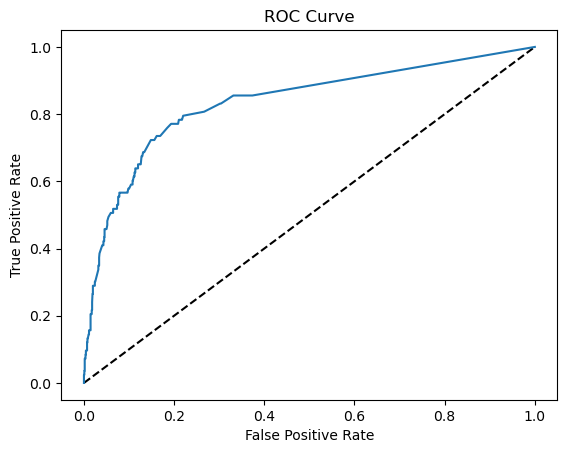

In [10]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()